## Hierarchial Clustering
Works better on smaller datasets. Kinda more expensive as well

Also called AGGLOMERATIVE clustering

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv(r"C:\Rig\Pandora's BOX\ML ig\Datasets\penguins_Clustering.csv")

In [113]:
df.shape

(344, 5)

In [115]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [117]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [119]:
df = df.dropna()

In [121]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


In [123]:
df.value_counts('sex')

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [125]:
df = df[df['sex'] != '.']

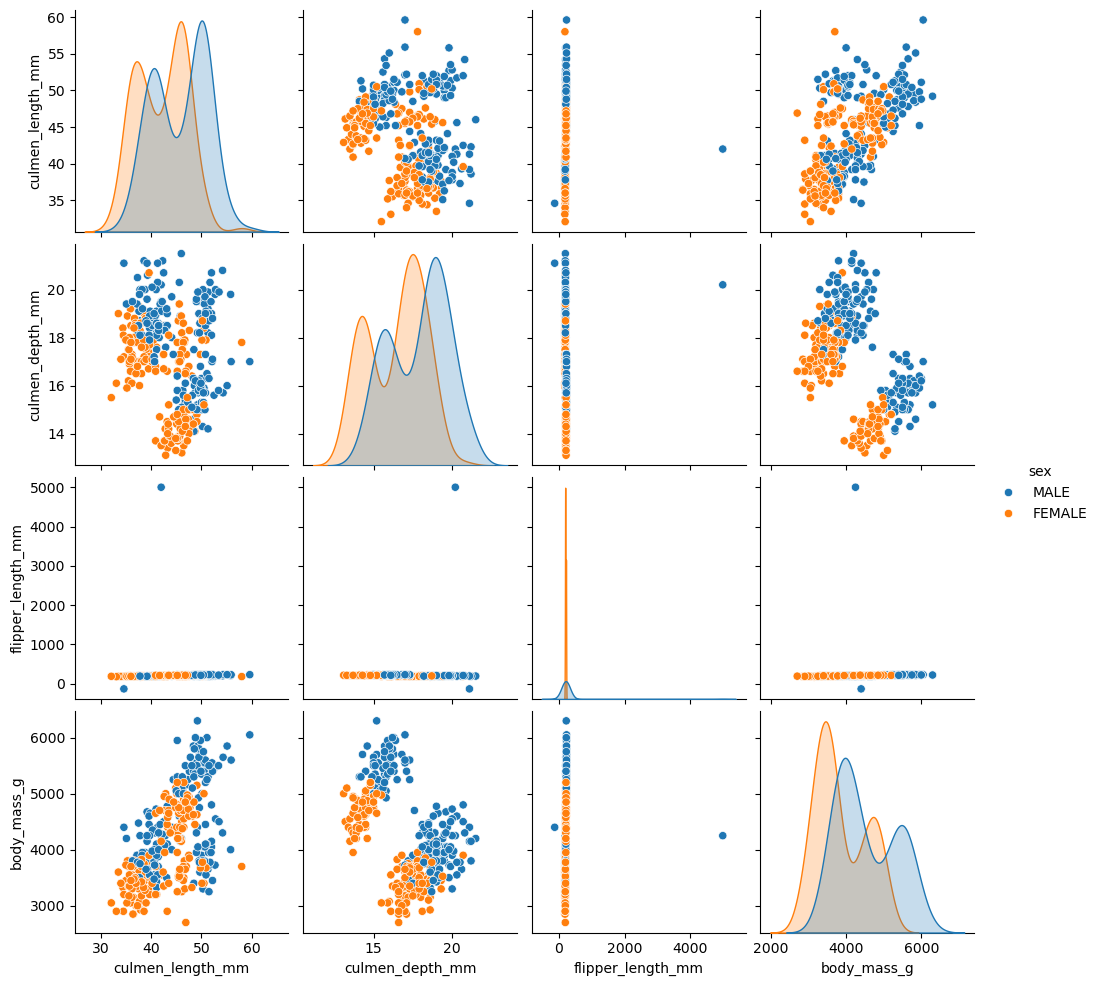

In [22]:
sns.pairplot(df, hue='sex')

In [127]:
df['sex'] = df['sex'].map({'MALE': 1,'FEMALE': 0})

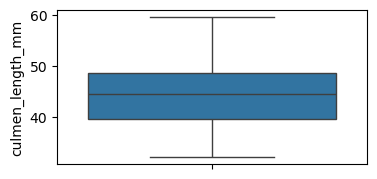

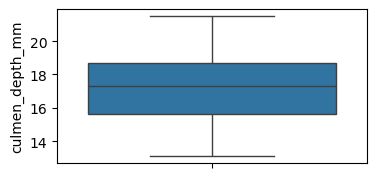

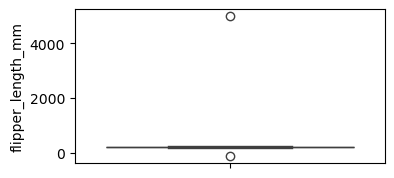

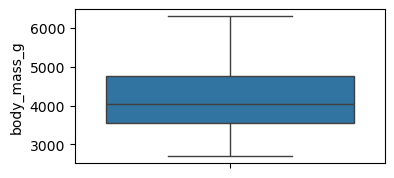

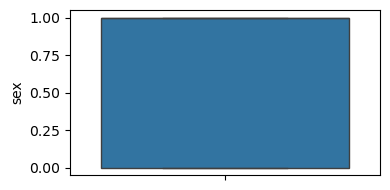

In [129]:
for col in df.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(y=df[col])
plt.tight_layout()
plt.show()

Making Outliers= highest and lowest values respectively.
Heirarchial Clustering is sensitive to Outlier data

In [132]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    low = q1 - 1.5 * IQR
    up = q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=low, upper=up) 

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

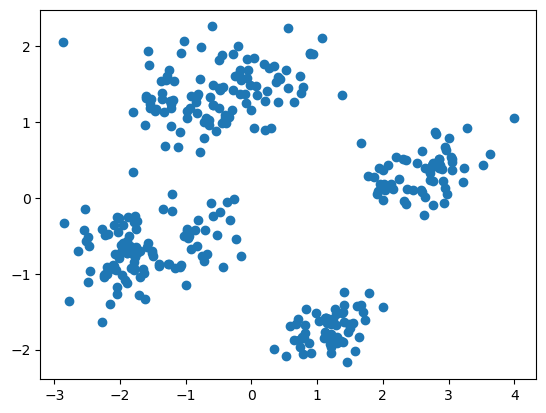

In [138]:
plt.scatter(X_pca[:,0], X_pca[:,1])

### Dendogram

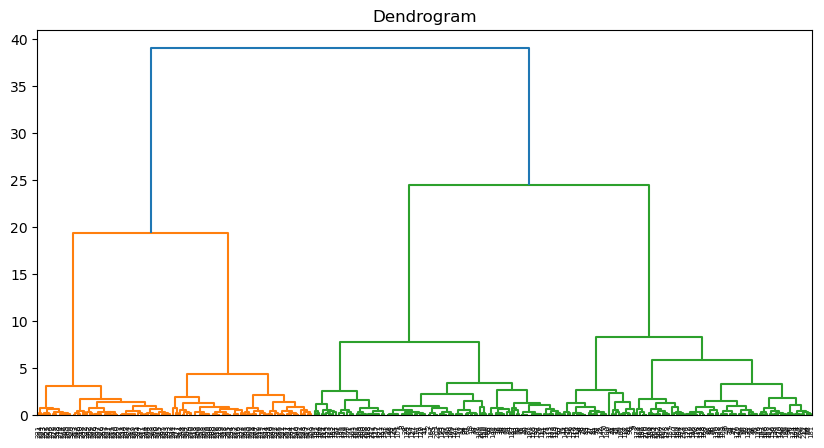

In [153]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(10,5))
plt.title('Dendrogram')

sc.dendrogram(sc.linkage(X_pca, method='ward'))
plt.show()

In [163]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean',linkage='ward')
cluster.fit(X_pca)

AgglomerativeClustering()

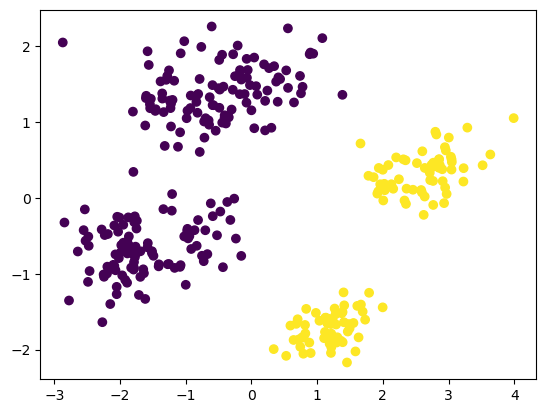

In [165]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster.labels_)

In [177]:
from sklearn.metrics import silhouette_score
sil_coff = []
for i in range(2,10):
    cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean',linkage='ward')
    cluster.fit(X_pca)
    score = silhouette_score(X_pca, cluster.labels_)
    sil_coff.append(score)

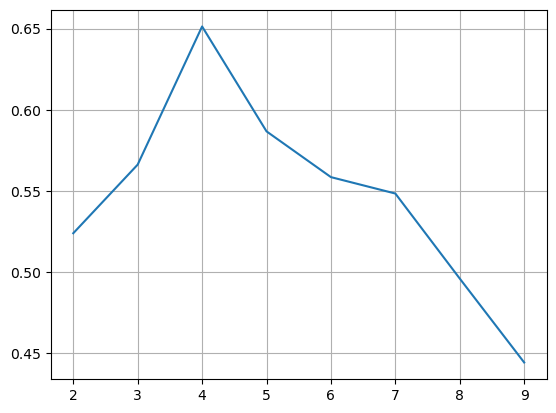

In [179]:
plt.plot(range(2,10), sil_coff)
plt.xticks(range(2,10))
plt.grid()

### Not that accurate
The no. of clusters is supposed to be 4. This is an inaccurate clustering by agglomerative algorithm